<img src="https://www.python.org/static/img/python-logo.png" width="300" alt="Python logo"  />
<font color='blue'>
$\Large\text{Pontificia Universidad Católica del Perú}$</font>

$$\Large \textit{Estadística Aplicada}$$

$$\large\textbf{Exploración y Comprensión de Datos}$$

_Autores:_

*   Gustavo Mallqui
*   Wilder Cruz

___

# Actividad 1

### **Lectura de una base de datos**


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving morosidad_train_test.csv to morosidad_train_test.csv


In [ ]:
import pandas as pd

df = pd.read_csv('/content/morosidad_train_test.csv')
df.head(4)

,idPrestamo,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term,default_request_amount
0,LIBDISP9832897855,1,252.39,9.0,"1,200",6,289.11,1140.125000,MALE,C,NORMAL,Secundaria,1,0
1,LIBDISP9021501745,1,244.57,50.0,"2,200",12,696.15,1061.375000,FEMALE,S,NORMAL,Secundaria,0,0
2,LIBDISP4057314971,0,491.5,64.0,"1,000",3,84.99,2082.196667,FEMALE,S,NORMAL,Secundaria,0,0
3,LIBDISP8375185888,0,848.65,77.0,"1,500",6,221.53,3422.423333,MALE,S,NORMAL,Universitaria,0,0


**Notas:**

*   La lectura de los datos dependerá del tipo de archivo donde estén almacenados tus datos y de donde estén almacenados.



Otras formas de coneccion a una base de datos en SQL:

In [ ]:
## pip install pyodbc

     |████████████████████████████████| 280 kB 5.1 MB/s 
  Created wheel for pyodbc: filename=pyodbc-4.0.32-cp37-cp37m-linux_x86_64.whl size=287310 sha256=675a6f452ee98b12344e747da36b2b804a7514664f5a23fc40260a723c13fc2d
  Stored in directory: /root/.cache/pip/wheels/2e/9c/da/8652fd42e0f662015554f00a9e96fe4f438dfd1ef59787879e
Successfully built pyodbc


In [ ]:
# import pyodbc
# import pandas as pd

En conexiones al SQL, se debe de tener los siguientes input:

*   SERVER: Es el nombre del servidor donde se encuentra tu base de datos
*   DATABASE: Es el nombre de tu base de datos
*   Tabla: es una tabla con la información a analizar.
*   Trusted_Connection: En el caso se conecte con autentificacion de windows, sino se debe de colocar el user y pass respectivo.




In [ ]:
query=" select * from tabla"
sql_con = pyodbc.connect('driver={SQL Server};SERVER=XXXXX;Trusted_Connection=True;DATABASE=XXXX')
base  = pd.read_sql(query, sql_con)

# Actividad 2

Importando librerias

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#visualizacion dataframe
pd.options.display.max_rows=500 #dar un maximo de columna t fias (para que no aprezca puntito)
pd.options.display.max_columns=500

In [ ]:
df.head(3)

,idPrestamo,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term,default_request_amount
0,LIBDISP9832897855,1,252.39,9.0,"1,200",6,289.11,1140.125000,MALE,C,NORMAL,Secundaria,1,0
1,LIBDISP9021501745,1,244.57,50.0,"2,200",12,696.15,1061.375000,FEMALE,S,NORMAL,Secundaria,0,0
2,LIBDISP4057314971,0,491.5,64.0,"1,000",3,84.99,2082.196667,FEMALE,S,NORMAL,Secundaria,0,0


Inspeccionando la estructura del dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   idPrestamo                     1194 non-null   object 
 1   target                         1194 non-null   int64  
 2   monthly_debt_capacity          1194 non-null   object 
 3   var_employment_time_in_months  1055 non-null   float64
 4   approved_amount                1194 non-null   object 
 5   approved_term                  1194 non-null   int64  
 6   approved_interest_amount       1194 non-null   object 
 7   var_net_income                 1194 non-null   float64
 8   person_gender                  1194 non-null   object 
 9   credit_history_marital_status  1194 non-null   object 
 10  var_max_sbs_qual_12m           1194 non-null   object 
 11  person_degree_type_desc        1194 non-null   object 
 12  default_request_term           1194 non-null   i

Extrayendo algunos descriptivos

In [ ]:
df.describe().T # la T es la transpuesta

,count,mean,std,min,25%,50%,75%,max
target,1194.0,0.294807,0.456147,0.0,0.0000,0.000000,1.000000,1.0
var_employment_time_in_months,1055.0,34.236019,27.120370,-1.0,11.0000,25.000000,62.000000,87.0
approved_term,1194.0,6.481575,3.020757,1.0,6.0000,6.000000,6.000000,12.0
var_net_income,1194.0,2726.751860,1869.715874,0.0,1780.0825,2385.176667,3087.641667,28587.0
default_request_term,1194.0,0.507538,0.500153,0.0,0.0000,1.000000,1.000000,1.0
default_request_amount,1194.0,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.0


¿Porque el campo monthly_debt_capacity, no lo muestra?

In [ ]:
df['monthly_debt_capacity'].unique()

array(['252.39', '244.57', '491.5', ..., '555.47', '508.82', '321.48'],
      dtype=object)

In [ ]:
l=set(df['monthly_debt_capacity'].values)
l

{'622.48',
 '284.01',
 '150.65',
 '456.4',
 '431.93',
 '622.59',
 '477.17',
 '1,046.79',
 '350.76',
 '330',
 '920.45',
 '710.72',
 '453.33',
 '389.81',
 '329.69',
 '501.55',
 '1,953.12',
 '715.08',
 '594.03',
 '721',
 '1,399.41',
 '632.18',
 '585.34',
 '148.04',
 '230.82',
 '1,852.79',
 '286.16',
 '186.65',
 '1,272.23',
 '1,226.21',
 '376.01',
 '783.42',
 '525.46',
 '550.45',
 '942.41',
 '279.32',
 '889.23',
 '582.41',
 '700.53',
 '916.34',
 '386.6',
 '860',
 '113.29',
 '219.33',
 '871.9',
 '629.51',
 '428.27',
 '291.74',
 '516.25',
 '313.69',
 '457.63',
 '506.91',
 '398.25',
 '685.63',
 '346.22',
 '369.64',
 '426.2',
 '217.17',
 '317.27',
 '2,119.04',
 '597.11',
 '588.78',
 '384.98',
 '358.98',
 '956.36',
 '253.51',
 '553.43',
 '304.02',
 '322.23',
 '244.37',
 '727.2',
 '342.97',
 '271.99',
 '544.69',
 '1,351.64',
 '594.06',
 '467.89',
 '1,148.38',
 '304.33',
 '318.84',
 '520',
 '1,207.59',
 '539.84',
 '223.24',
 '288.95',
 '430.13',
 '718.51',
 '306.93',
 '361.37',
 '601.43',
 '425.4

Corrigiendo, mediante un reemplazo para volverlo numérico

In [ ]:
df['monthly_debt_capacity']=df['monthly_debt_capacity'].str.replace(",", "")
df['monthly_debt_capacity']=df['monthly_debt_capacity'].astype('float64')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,1194.0,0.294807,0.456147,0.00,0.0000,0.000000,1.000000,1.0
monthly_debt_capacity,1194.0,596.292119,476.308950,110.82,362.1550,491.585000,672.155000,7243.2
var_employment_time_in_months,1055.0,34.236019,27.120370,-1.00,11.0000,25.000000,62.000000,87.0
approved_term,1194.0,6.481575,3.020757,1.00,6.0000,6.000000,6.000000,12.0
var_net_income,1194.0,2726.751860,1869.715874,0.00,1780.0825,2385.176667,3087.641667,28587.0
default_request_term,1194.0,0.507538,0.500153,0.00,0.0000,1.000000,1.000000,1.0
default_request_amount,1194.0,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   idPrestamo                     1194 non-null   object 
 1   target                         1194 non-null   int64  
 2   monthly_debt_capacity          1194 non-null   float64
 3   var_employment_time_in_months  1055 non-null   float64
 4   approved_amount                1194 non-null   object 
 5   approved_term                  1194 non-null   int64  
 6   approved_interest_amount       1194 non-null   object 
 7   var_net_income                 1194 non-null   float64
 8   person_gender                  1194 non-null   object 
 9   credit_history_marital_status  1194 non-null   object 
 10  var_max_sbs_qual_12m           1194 non-null   object 
 11  person_degree_type_desc        1194 non-null   object 
 12  default_request_term           1194 non-null   i

### **Cuantitativos:**

#### **Dispersiones**

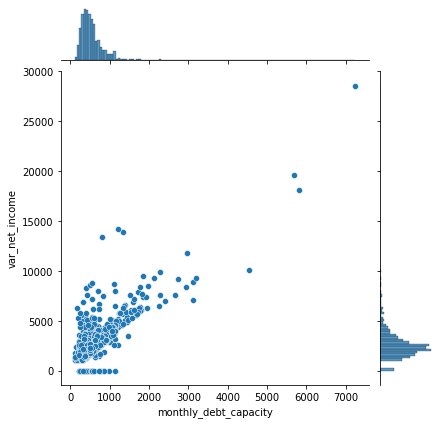

In [ ]:
sns.jointplot(data = df,x = "monthly_debt_capacity", y = "var_net_income" );

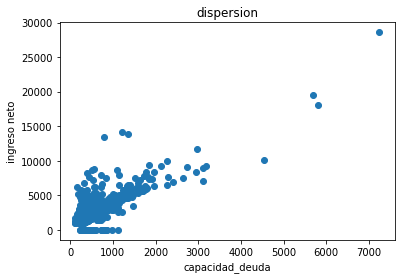

In [ ]:
plt.scatter(df["monthly_debt_capacity"], df["var_net_income"])
plt.title('dispersion')
plt.xlabel('capacidad_deuda')
plt.ylabel('ingreso neto')
plt.show()

#### **Distribuciones y Densidades**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


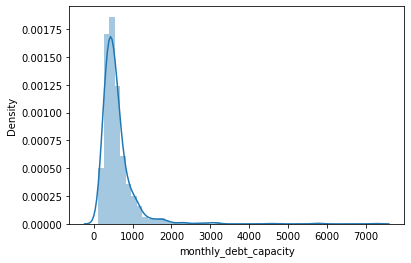

In [ ]:
sns.distplot(df['monthly_debt_capacity'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


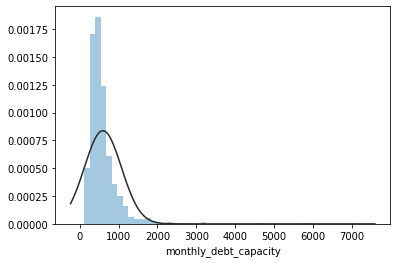

In [ ]:
from scipy.stats import norm
ax = sns.distplot(df['monthly_debt_capacity'], fit=norm, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


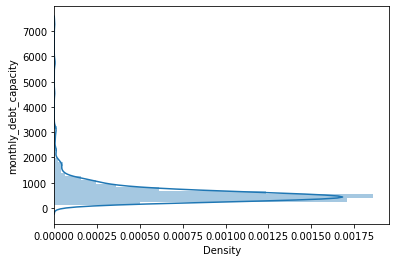

In [ ]:
ax = sns.distplot(df['monthly_debt_capacity'], vertical=True)

#### **Cajas y Bigotes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   idPrestamo                     1194 non-null   object 
 1   target                         1194 non-null   int64  
 2   monthly_debt_capacity          1194 non-null   float64
 3   var_employment_time_in_months  1055 non-null   float64
 4   approved_amount                1194 non-null   object 
 5   approved_term                  1194 non-null   int64  
 6   approved_interest_amount       1194 non-null   object 
 7   var_net_income                 1194 non-null   float64
 8   person_gender                  1194 non-null   object 
 9   credit_history_marital_status  1194 non-null   object 
 10  var_max_sbs_qual_12m           1194 non-null   object 
 11  person_degree_type_desc        1194 non-null   object 
 12  default_request_term           1194 non-null   i

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


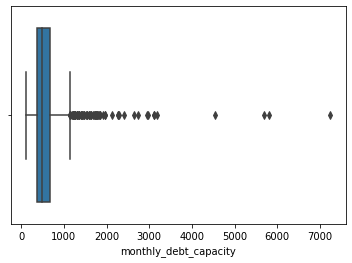

In [ ]:
from seaborn import boxplot
boxplot(df['monthly_debt_capacity'])

Text(0.5, 1.0, 'monthly_debt_capacity')

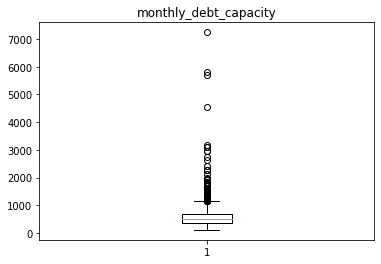

In [ ]:
plt.boxplot(df['monthly_debt_capacity'])
plt.title('monthly_debt_capacity')

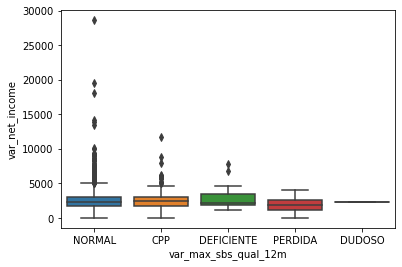

In [ ]:
sns.boxplot(x="var_max_sbs_qual_12m",
                y="var_net_income",
                data=df)

### **Cualitativos:**

In [ ]:
import numpy as np

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   idPrestamo                     1194 non-null   object 
 1   target                         1194 non-null   int64  
 2   monthly_debt_capacity          1194 non-null   float64
 3   var_employment_time_in_months  1055 non-null   float64
 4   approved_amount                1194 non-null   object 
 5   approved_term                  1194 non-null   int64  
 6   approved_interest_amount       1194 non-null   object 
 7   var_net_income                 1194 non-null   float64
 8   person_gender                  1194 non-null   object 
 9   credit_history_marital_status  1194 non-null   object 
 10  var_max_sbs_qual_12m           1194 non-null   object 
 11  person_degree_type_desc        1194 non-null   object 
 12  default_request_term           1194 non-null   i

#### **Pie**

No es directo, primero se debe tener un resumen y es al resumen que se le aplica el gráfico de pie.

In [ ]:
pie_genero=df.groupby(['person_gender'])['person_gender'].agg(n=np.size)

In [ ]:
pie_genero=df.groupby(['person_gender'])['person_gender'].agg(n=np.size)
pie_genero=pie_genero.reset_index()
pie_genero

,person_gender,n
0,FEMALE,389
1,MALE,805


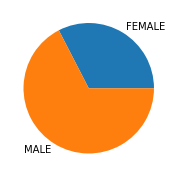

In [ ]:
# Creating plot
fig = plt.figure(figsize =(5, 3))
plt.pie(pie_genero['n'], labels = pie_genero['person_gender'])
 
# show plot
plt.show()

#### **Barras**

Text(0.5, 1.0, 'person_gender')

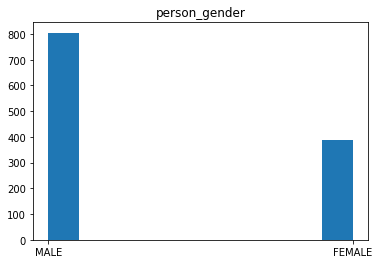

In [ ]:
plt.hist(df['person_gender'].dropna())
plt.title('person_gender')

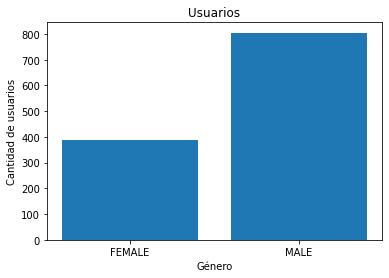

In [ ]:
## Creamos Gráfica
plt.bar(pie_genero['person_gender'],pie_genero['n'])
 
## Legenda en el eje y
plt.ylabel('Cantidad de usuarios')
 
## Legenda en el eje x
plt.xlabel('Género')
 
## Título de Gráfica
plt.title('Usuarios')
 
## Mostramos Gráfica
plt.show()

#### **Violin**

In [ ]:
df['approved_amount']=df['approved_amount'].str.replace(",", "")
df['approved_amount']=df['approved_amount'].astype('float64')

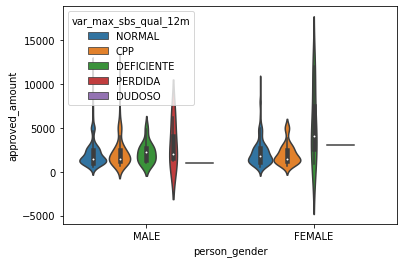

In [ ]:
from seaborn import violinplot
violinplot(x="person_gender", y="approved_amount", hue="var_max_sbs_qual_12m", data=df)

# **¿Cómo generarlo un poco más automático?**

In [ ]:
import matplotlib

#### 1 Homogenizar los campos (trabajo data cleaning)

In [ ]:
df.dtypes

idPrestamo                        object
target                             int64
monthly_debt_capacity            float64
var_employment_time_in_months    float64
approved_amount                   object
approved_term                      int64
approved_interest_amount          object
var_net_income                   float64
person_gender                     object
credit_history_marital_status     object
var_max_sbs_qual_12m              object
person_degree_type_desc           object
default_request_term               int64
default_request_amount             int64
dtype: object

In [ ]:
var=['monthly_debt_capacity','var_net_income','person_gender','person_degree_type_desc']

In [ ]:
df2=df[var].copy(deep=True)

In [ ]:
df2.head(3)

,monthly_debt_capacity,var_net_income,person_gender,person_degree_type_desc
0,252.39,1140.125000,MALE,Secundaria
1,244.57,1061.375000,FEMALE,Secundaria
2,491.50,2082.196667,FEMALE,Secundaria


In [ ]:
df2.dtypes

monthly_debt_capacity      float64
var_net_income             float64
person_gender               object
person_degree_type_desc     object
dtype: object

In [ ]:
df2.monthly_debt_capacity=df2.monthly_debt_capacity.astype('float64')
df2.var_net_income=df2.var_net_income.astype('float64')
df2.person_gender=df2.person_gender.astype('category')
df2.person_degree_type_desc=df2.person_degree_type_desc.astype('category')


In [ ]:
df2.dtypes

monthly_debt_capacity       float64
var_net_income              float64
person_gender              category
person_degree_type_desc    category
dtype: object

#### 2 trabajar funciones

In [ ]:
def univariado(df):
    v0=pd.DataFrame({"variable": df.columns.values})
    t0=pd.DataFrame({"tipo": df.dtypes.values})
    meta = pd.concat([v0, t0], axis=1)
    matplotlib.rcParams.update({'font.size': 14})
    for i in range(len(meta)) :
        plt.figure(figsize=(20,5))
        v=meta.iloc[i].variable #print(meta.iloc[i].variable)
        t=meta.iloc[i].tipo
        if (t.__class__.__name__=="CategoricalDtype"):
            fa=df[v].value_counts() 
            fr=fa/len(df[v]) 
            #Barras
            plt.subplot(1,2,1)
            plt.bar(fa.index,fa)
            plt.xticks(fa.index)
            plt.title(v)
            #Pie
            plt.subplot(1,2,2)
            plt.pie(fr,autopct='%1.1f%%', shadow=True, startangle=90)
            plt.legend(fr.index,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
            plt.title(v)
            #Guardar
            #plt.savefig(v+".jpg")
        else:
            #Histograma
            plt.subplot(1,2,1)
            plt.hist(df[v].dropna())
            plt.title(v)
            #Boxplot
            plt.subplot(1,2,2)
            plt.boxplot(df[v])
            plt.title(v)
            #Guardar
            #plt.savefig(v+".jpg")
        plt.show()


#### 3 usar las funciones

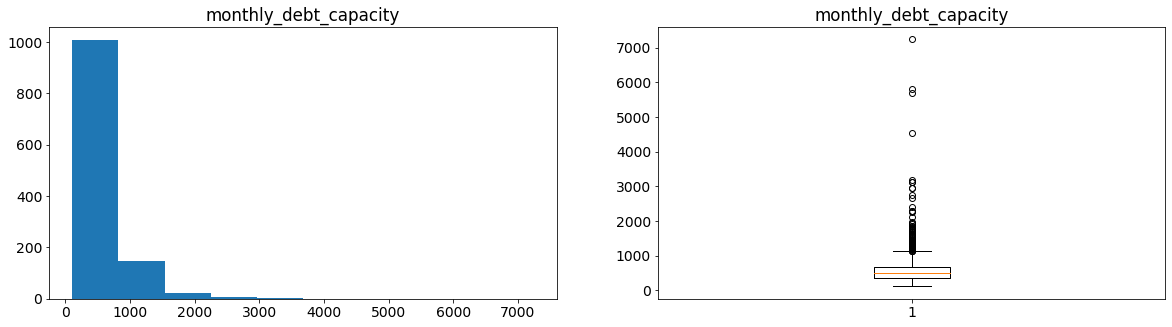

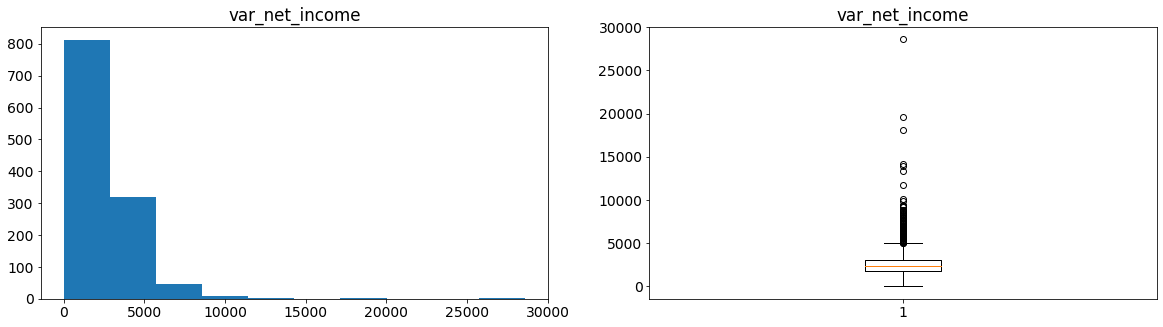

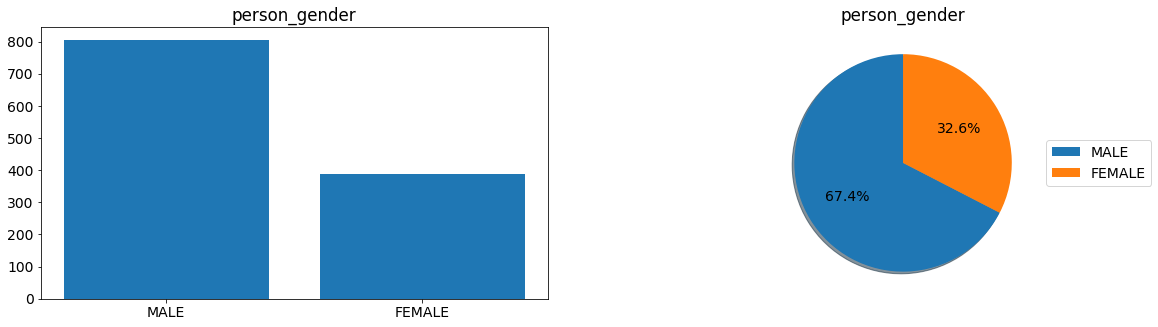

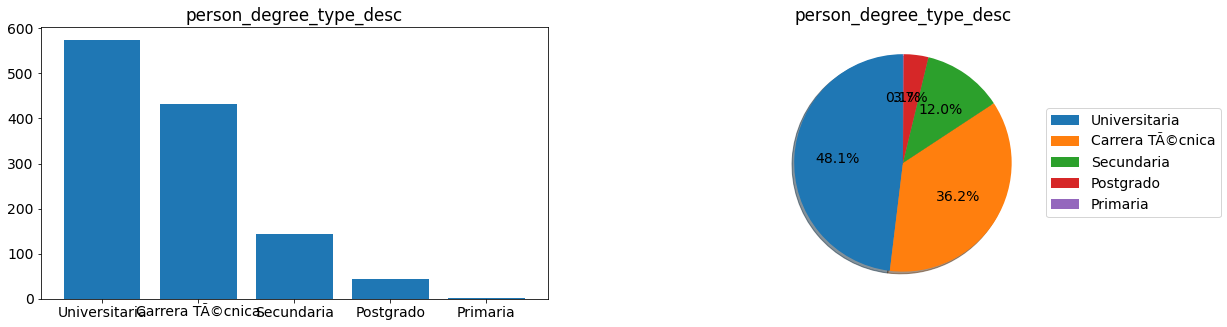

In [ ]:
univariado(df2)

In [ ]:
univariado(df2)